<a href="https://colab.research.google.com/github/rockey1006/Variational-Autoencoders/blob/master/Facenet_VAE_6_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/rockey1006/facenet.git
!pip uninstall tensorflow
!pip install tensorflow==1.13.2

Cloning into 'facenet'...
remote: Enumerating objects: 3154, done.
remote: Total 3154 (delta 0), reused 0 (delta 0), pack-reused 3154
Receiving objects: 100% (3154/3154), 2.94 MiB | 20.75 MiB/s, done.
Resolving deltas: 100% (2234/2234), done.
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 92.6MB 47kB/s 
     |████████████████████████████████| 3.2MB 36.3MB/s 
     |████████████████████████████████| 368kB 42.0MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled t

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/model.ckpt.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/model.ckpt')

In [6]:

from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/smile3.ckpt.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/smile1.ckpt')

In [7]:
!pip install facenet

     |████████████████████████████████| 2.0MB 2.7MB/s 


In [13]:
!python facenet/src/generative/modify_attribute.py \
facenet.src.generative.models.dfc_vae \
/content/facenet/model.ckpt/model.ckpt-50000 \
/content/facenet/smile1.ckpt/attribute_vectors.h5 \
/content/facenet/add.png
#Modify attributes.py  1.by adding import facenet.src.facenet as facenet
#   2.import imageio         imageio.imwrite(image_filename, recon[16])(single face)
# imageio.imwrite(image_filename, img)(several faces)
#Modify dfc_vae.py :import facenet.src.generative.models.vae_base
#downgrade tensorflow from 2.0 to 1.13.2 
#see cature.jpg in google drive



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

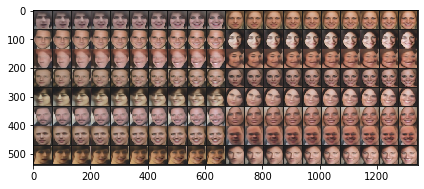

In [11]:
from skimage import data, io

img = io.imread("/content/facenet/add.png")
io.imshow(img)

io.show() 

In [14]:
import h5py

In [15]:
f = h5py.File('/content/facenet/smile1.ckpt/attribute_vectors.h5' , 'r')
f.keys()
print([key for key in f.keys()])

['attribute_vectors', 'attributes', 'fields', 'latent_vars']


In [27]:
print(f['attribute_vectors'][0])
print(f['attribute_vectors'][0].shape)
print(f['attribute_vectors'][:].shape)#the attribute vectors of the first picture,which conclude 40 different attributes 

[ 4.9690098e-01 -2.2236981e+00 -9.5140058e-01  4.5548522e-01
  4.0420133e-01 -1.2824891e+00 -2.5795272e-01 -1.6691494e+00
 -1.2213949e+00 -8.4015131e-01  1.6572468e-01  8.8549793e-01
  7.6115453e-01  4.0177982e-02 -1.0064527e+00 -7.2474712e-01
 -2.1008898e-03 -1.4522761e-01 -1.1931581e+00 -2.4698684e+00
  9.0257919e-01  6.2005657e-01 -2.5407524e+00 -1.8567913e+00
  8.8316053e-01  1.5473387e+00 -1.7422382e+00 -4.3661568e-01
  3.2822754e+00 -1.7006721e+00  2.9449611e+00  2.2566986e+00
  6.8932962e-01  4.2102119e-01  1.2431977e+00  2.8630710e+00
  2.1380966e+00 -1.3154411e+00 -4.9310946e+00 -6.1485392e-01
  1.0928419e+00  1.7278250e+00 -1.9333042e+00 -7.2790790e-01
  1.3599554e+00  1.6802926e+00  1.7980075e+00  2.4120419e+00
  6.3895774e-01 -2.3152409e+00 -2.9204890e-01  1.7360147e+00
 -1.3102057e+00 -3.2105151e-01 -1.3906509e+00  1.1040765e+00
 -1.6210674e+00 -1.1985996e+00  1.1534052e+00 -1.2538301e-02
  7.4014507e-02  3.1680427e+00 -1.7528603e+00 -1.0983475e+00
 -1.3083934e+00  8.12611

In [29]:
print(f['attributes'][0])
print(f['attributes'][0].shape)
print(f['attributes'][:].shape)
#the attribute signs of the first picture,which conclude 40 different attributes.true?1:-1

[-1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.
  1. -1. -1.  1.]
(40,)
(202039, 40)


In [30]:
print(f['fields'][:].shape)
print(f['fields'][0])
print(f['fields'][0].shape)

(40,)
b'5_o_Clock_Shadow'
()


In [32]:
print(f['latent_vars'][0])
print(f['latent_vars'][0].shape)
print(f['latent_vars'][:].shape)

[  9.57806969  -2.44542766   9.84553814  -1.23076797  -9.83927059
   2.77560902   0.15794477   2.75363064   1.3912673   10.22118473
  -3.07719493   8.77167606   9.94283772   2.55342793 -16.96492958
   1.06026006 -10.71498394   8.59589958   4.02634907   0.91516626
  -0.42602351 -16.40547943   1.36647415  -0.71251249  -7.46179724
  11.94006157  -1.47682703  -0.61226481  14.52060795   2.42346811
  11.9067688  -10.29400253  -5.1533742   -2.11386061 -17.9377594
   3.29497004  -8.08764744   3.32389355  12.97835732   2.77429581
  -4.01240158  -0.72813052   8.6763134    4.88534451   4.68654966
   0.42258614  -5.70769024  11.49412251  -3.54553294  17.44226265
  16.44719124   8.04528141   6.58571577  -7.02796268  -3.30043864
  -4.25645542  -8.01248169   2.02552414 -12.52733803   3.96819997
  -8.86146736  14.12550163 -20.7651062   -0.78500563  -7.32600927
  -0.88494521  -1.83514321   8.5853281  -18.38063622  -6.6998992
   0.50961733  -0.27741393   2.22446704  -6.87333679   3.47479892
  -1.9890910